In [1]:
import principal_portfolios as pp
import utils
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from functools import reduce

### Reading MS data and Merging portfolio data into a dataframe.

In [2]:
data_to_read_address = "data/FX/Portfolio/MSFX.xlsx"
fx_ms_df = pd.read_excel(data_to_read_address)

dfs = []

# Loop through the dataframe, two columns at a time (one for date, one for value)
for i in range(0, len(fx_ms_df.columns), 2):
    date_col = fx_ms_df.columns[i]
    value_col = fx_ms_df.columns[i + 1]
    
    # Rename the columns for clarity
    instrument_name = date_col.replace(' Index', '')
    
    # Create a new dataframe for the current instrument
    temp_df = fx_ms_df[[date_col, value_col]].copy()
    temp_df.columns = ['date', instrument_name]
    
    # Remove rows where the date is NaT or NaN in both columns
    temp_df = temp_df.dropna(subset=['date', instrument_name])
    
    # Append the dataframe to the list
    dfs.append(temp_df)

# Perform an inner join on the 'date' column for all dataframes
merged_ms_prtf_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dfs)

# Remove any remaining rows with NaT or NaN after merging
merged_ms_prtf_df.dropna(inplace=True)
merged_ms_prtf_df = utils.construct_monthly_return_FX_portfolios_datasets(merged_ms_prtf_df)

### Reading DB data

In [3]:
data_to_read_address = "data/FX/Portfolio/DB_FX_PRTF_1.xlsx"
db_data_df_1= pd.read_excel(data_to_read_address)
db_data_df_1.dropna(inplace=True)
monthly_db_1_returns = utils.construct_monthly_return_FX_portfolios_datasets(db_data_df_1)

In [4]:
data_to_read_address = "data/FX/Portfolio/DB_FX_PRTF_2.xlsx"
db_data_df_2= pd.read_excel(data_to_read_address)
db_data_df_2.dropna(inplace=True)
monthly_db_2_returns = utils.construct_monthly_return_FX_portfolios_datasets(db_data_df_2)

In [5]:
data_to_read_address = "data/FX/Portfolio/DB_FX_PRTF_3.xlsx"
db_data_df_3= pd.read_excel(data_to_read_address)
db_data_df_3.dropna(inplace=True)
monthly_db_3_returns = utils.construct_monthly_return_FX_portfolios_datasets(db_data_df_3)

In [6]:
data_to_read_address = "data/FX/Portfolio/DB_FX_PRTF_4.xlsx"
db_data_df_4= pd.read_excel(data_to_read_address)
db_data_df_4.dropna(inplace=True)
monthly_db_4_returns = utils.construct_monthly_return_FX_portfolios_datasets(db_data_df_4)

In [7]:
dfs = [merged_ms_prtf_df, monthly_db_1_returns, monthly_db_2_returns, monthly_db_3_returns, monthly_db_4_returns]

# Perform inner join on 'id' column for all DataFrames
basket_portfolios = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dfs)

In [8]:
basket_portfolios = utils.exclude_redundant_columns_FX_portfolios_datasets(basket_portfolios)

In [9]:
basket_portfolios

,date,MSCEAUDL,MSCEGBPL,MSCECADL,MSCEEURL,MSCEJPYL,MSCENZDL,MSCENOKL,MSCESEKL,MSCECHFL,...,MSCECARU,MSCEQSIU,MSCERERU,MSCEPOSU,Deutsche Bank FX Valuation USD Index,Deutsche Bank CoreSeries FX Carry Balanced USD Index,Deutsche Bank CoreSeries FX Carry Global USD Index,Deutsche Bank FX Momentum USD Index,DB G10 Currency Future Harvest TR Index,Deutsche Bank Short USD Currency Portfolio Index-Total Return
0,2002-04-30,2.261741,2.673501,1.946734,3.516918,3.197433,3.167814,5.717075,1.281210,3.956787,...,6.465285,3.581284,0.251789,-3.798736,-2.856305,2.138505,1.198208,-0.105282,0.685445,3.269872
1,2002-05-31,5.774722,0.153977,2.799906,4.024000,3.472052,7.924353,6.130986,5.600189,3.277331,...,11.624013,-0.587826,3.645497,7.127353,1.248650,1.827165,-0.264381,3.373320,4.101956,3.027094
2,2002-06-30,-0.350301,5.644340,0.887939,6.398691,3.954615,1.815455,6.856646,6.719680,5.948699,...,9.238869,-0.556348,-6.494722,10.319751,-4.763009,-1.972973,-4.104920,3.342460,-0.000564,5.343327
3,2002-07-31,-3.269792,2.315450,-4.010919,-1.106440,-0.334643,-4.022706,-1.232849,-2.947405,-0.183359,...,-4.094007,-1.274165,-4.464629,-2.181352,-3.199150,-0.828584,0.047092,0.057761,-2.325719,-0.831208
4,2002-08-31,2.121482,-0.734721,1.840665,0.911231,1.313791,1.205338,2.292833,2.234135,-0.590323,...,1.648070,1.222371,1.278436,1.154865,0.680392,2.055886,1.982307,-1.222818,1.380444,0.664984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2021-08-31,-0.580693,-1.015426,-1.199703,-0.502839,-0.118024,0.840719,1.477968,-0.419946,-1.135030,...,1.159625,-0.539140,0.717378,0.920022,-0.519411,0.996304,1.355685,-0.353066,1.231015,-0.498333
233,2021-09-30,-1.173452,-2.027793,-0.243338,-1.876842,-1.554024,-1.991199,-0.273971,-1.277719,-1.874076,...,4.726355,-1.043534,1.927623,2.590691,-0.117018,-0.634692,-1.692568,-0.675937,0.732560,-1.738730
234,2021-10-31,3.970678,1.659115,2.208131,-0.196370,-2.164148,3.770935,3.210533,1.845906,2.020671,...,-3.996640,0.388829,-2.077925,-3.630598,-3.077781,-0.977008,-2.412460,2.456797,3.335492,0.134899
235,2021-11-30,-5.603702,-3.482298,-3.362048,-2.782506,0.414521,-5.137153,-7.138163,-5.374156,-1.325493,...,10.338704,0.651213,-0.137276,5.327638,2.895012,-6.390116,-5.706928,-3.293615,-4.240511,-2.067530


## PP 

dict_keys(['fx_ms_portfolio_momentum_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df'])
return_of_simple_factor          -0.206855
realized_return_of_first_n_PP     0.122129
realized_return_of_first_n_PEP    0.599447
realized_return_of_last_n_PEP    -0.129695
long_short_realized_PEP           0.646062
                                    ...   
realized_return_of_16_PAP        -0.124893
realized_return_of_17_PAP        -0.047673
realized_return_of_18_PAP        -0.081146
realized_return_of_19_PAP         0.672608
PEP and PAP 1-n                   0.918438
Length: 104, dtype: float64


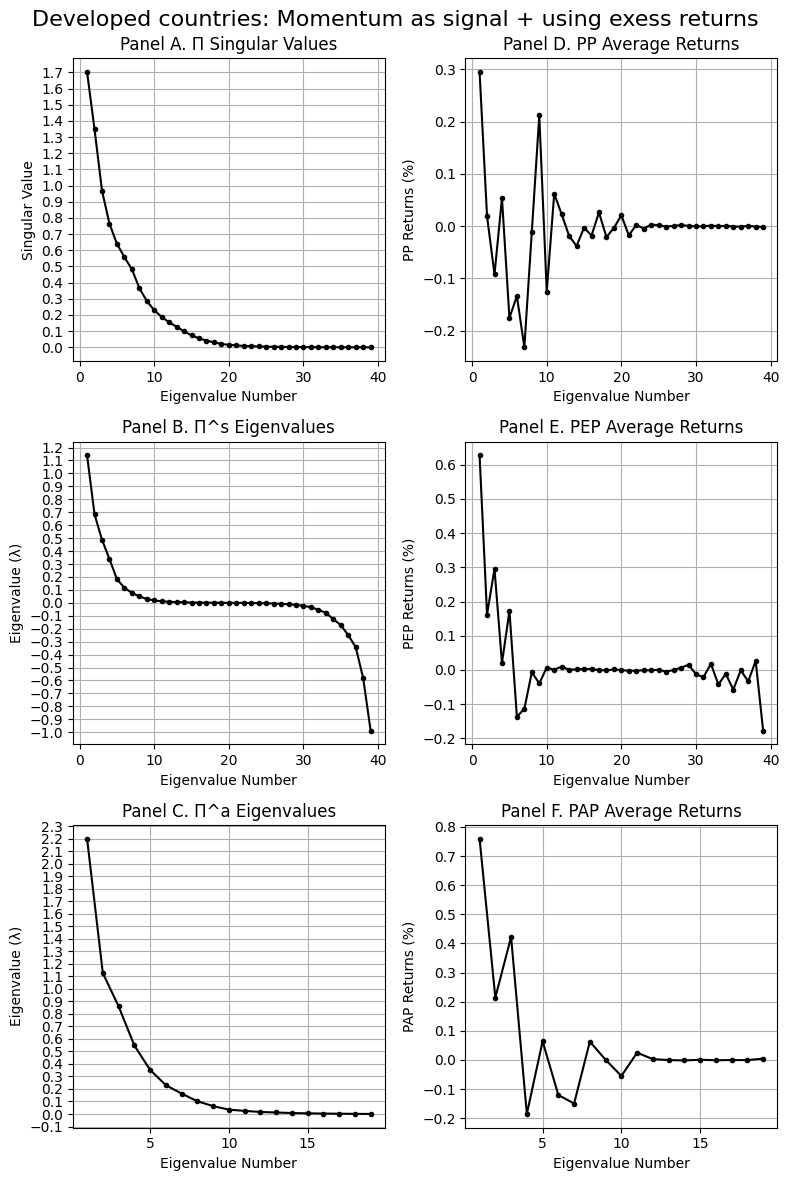

In [10]:
starting_year_to_filter = 1996
end_year_to_filter = 2024
number_of_lookback_periods = 120
number_of_PPs_to_consider = 3
number_of_PEPs_to_consider = 3
number_of_PAPs_to_consider = 3
output_dict_momentum = {}


basket_portfolios['date'] = utils.convert_date_column_for_monthly_data(basket_portfolios)
signal_df = utils.build_signal_df_for_1month_momentum(basket_portfolios)



portfolios_key = "fx_ms_portfolio_momentum_monthly"
output_dict_momentum[portfolios_key] = pp.build_PP(basket_portfolios,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=None, number_of_PPs_to_consider=number_of_PPs_to_consider,
                                                                   number_of_PEPs_to_consider=number_of_PEPs_to_consider, 
                                                                   number_of_PAPs_to_consider= number_of_PAPs_to_consider)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict_momentum.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict_momentum[portfolios_key].keys())
print(output_dict_momentum[portfolios_key]["sharpe_df"])

number_of_portfolios = basket_portfolios.shape[1]
title = 'Developed countries: Momentum as signal + using exess returns'

pp.singular_values_vs_realized_returns_graph(output_dict_momentum, portfolios_key, number_of_portfolios, title)

In [11]:
pp.calculate_sharpe_ratio(basket_portfolios.iloc[number_of_lookback_periods:,1:].mean(axis=1)) * math.sqrt(12)

-0.1404700578034548

In [12]:
basket_portfolios.iloc[number_of_lookback_periods:,1:].apply(lambda col: pp.calculate_sharpe_ratio(col)) * math.sqrt(12)

MSCEAUDL                                                        -0.171619
MSCEGBPL                                                        -0.178192
MSCECADL                                                        -0.213863
MSCEEURL                                                        -0.273125
MSCEJPYL                                                        -0.422406
MSCENZDL                                                         0.036836
MSCENOKL                                                        -0.318309
MSCESEKL                                                        -0.340279
MSCECHFL                                                        -0.121264
MSCEEAL                                                         -0.009324
MSCEEGL                                                          0.037739
MSCEECL                                                          0.003321
MSCEEJL                                                         -0.144011
MSCEEZL                               